<a href="https://colab.research.google.com/github/pH0ENIX-1/19CSE305-Sem-V-term-project/blob/Review-2-modifications/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd 
import numpy as np
#from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns



In [24]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler 

In [25]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [26]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [27]:

#boston = load_boston()
#df = pd.DataFrame(boston.data, columns=boston.feature_names)
df = pd.read_csv('boston.csv')
#df['MEDV'] = boston.target

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population

In [28]:
#print(load_boston()['DESCR'])

In [29]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

#### Feature Analysis and Visualisation

In [30]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [31]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [33]:
df.memory_usage()

Index       128
CRIM       4048
ZN         4048
INDUS      4048
CHAS       4048
NOX        4048
RM         4048
AGE        4048
DIS        4048
RAD        4048
TAX        4048
PTRATIO    4048
B          4048
LSTAT      4048
MEDV       4048
dtype: int64

In [34]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31c2e10370>,
      dtype=object)

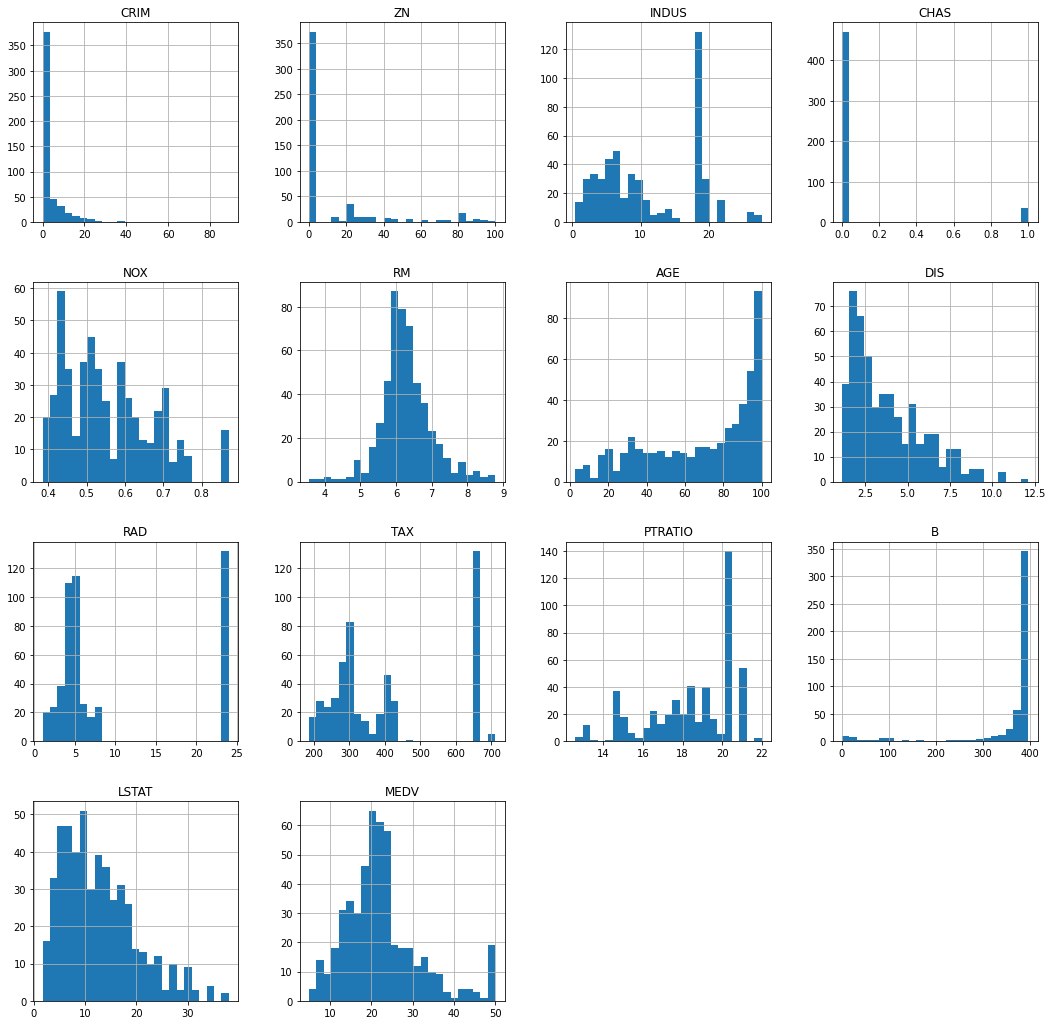

In [35]:
df.hist(figsize=(18,18), bins=25)

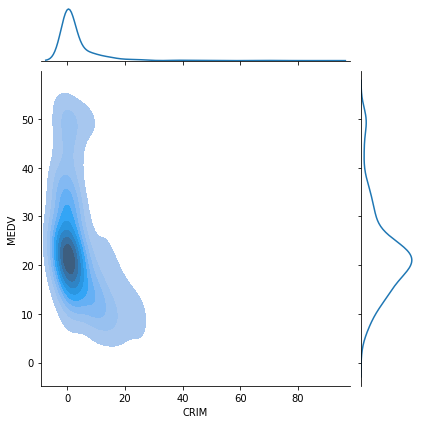

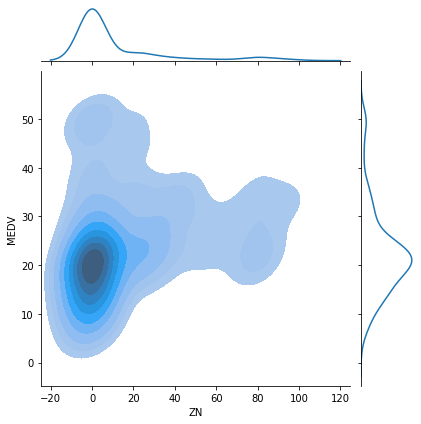

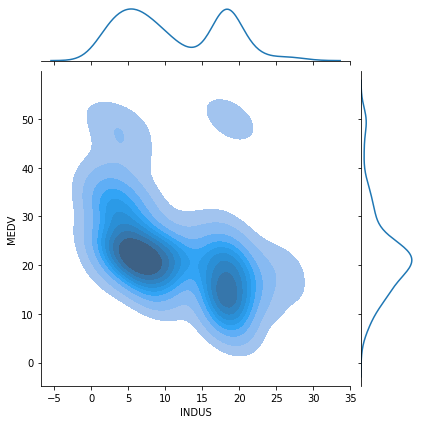

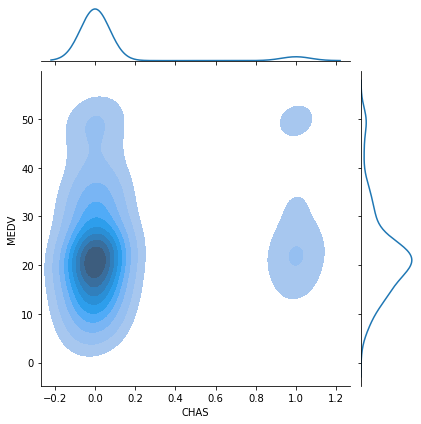

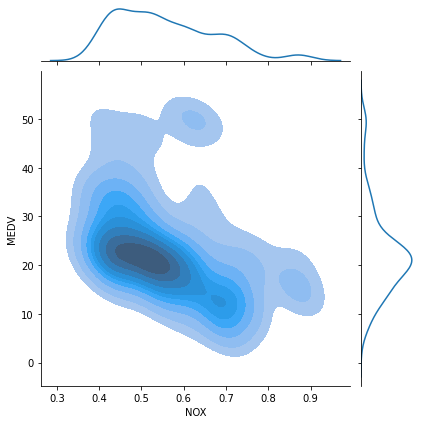

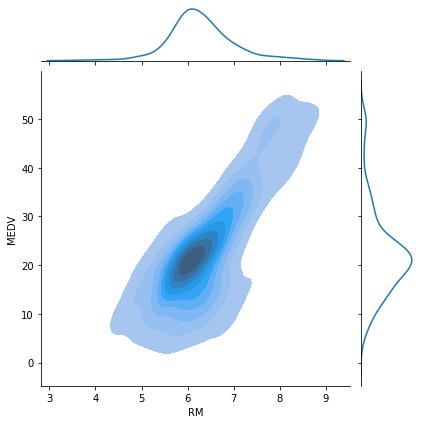

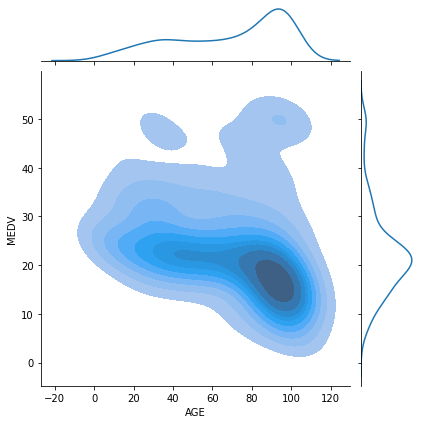

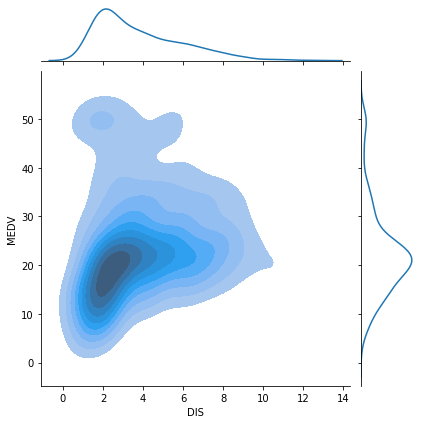

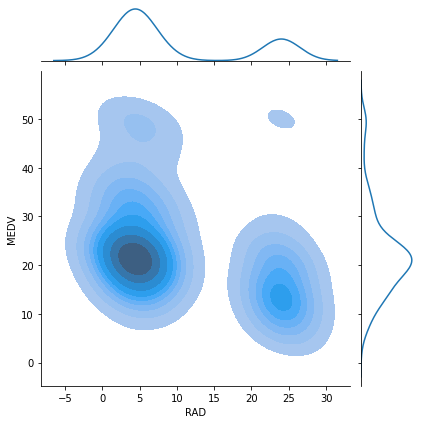

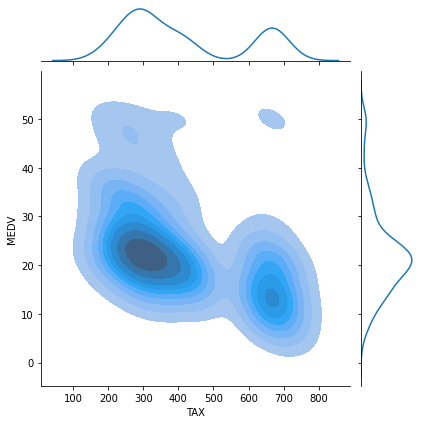

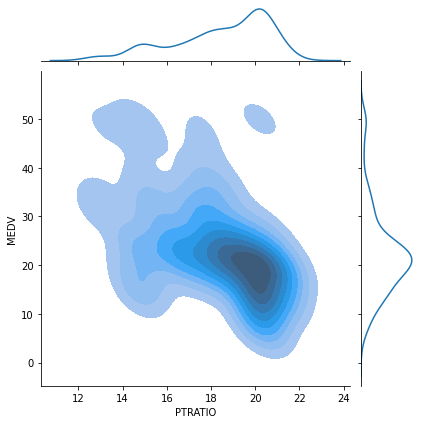

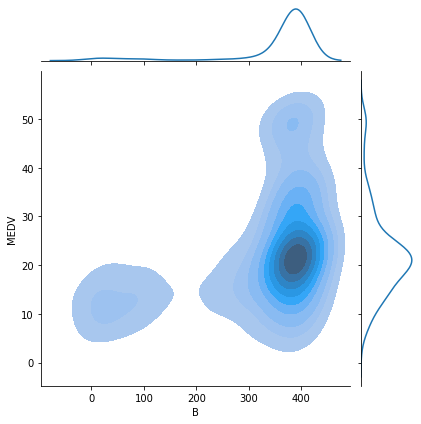

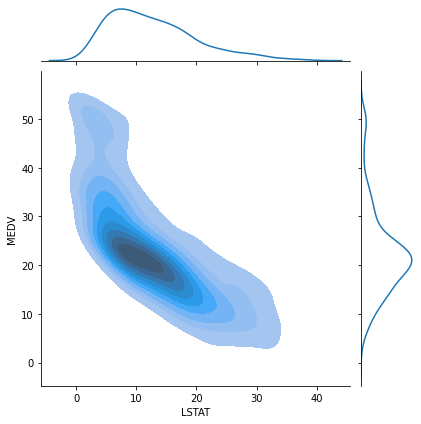

In [36]:
for i in df.columns:
    if i == 'MEDV':
        continue
    sns.jointplot(x =i, y ='MEDV', data = df,kind='kde', shade = True)

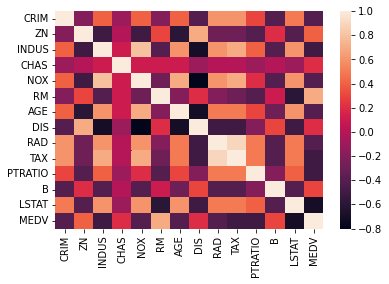

In [37]:
corr_matrix = df.corr().round(1)
sns.heatmap(data=corr_matrix)

In [38]:
df.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [39]:
df['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

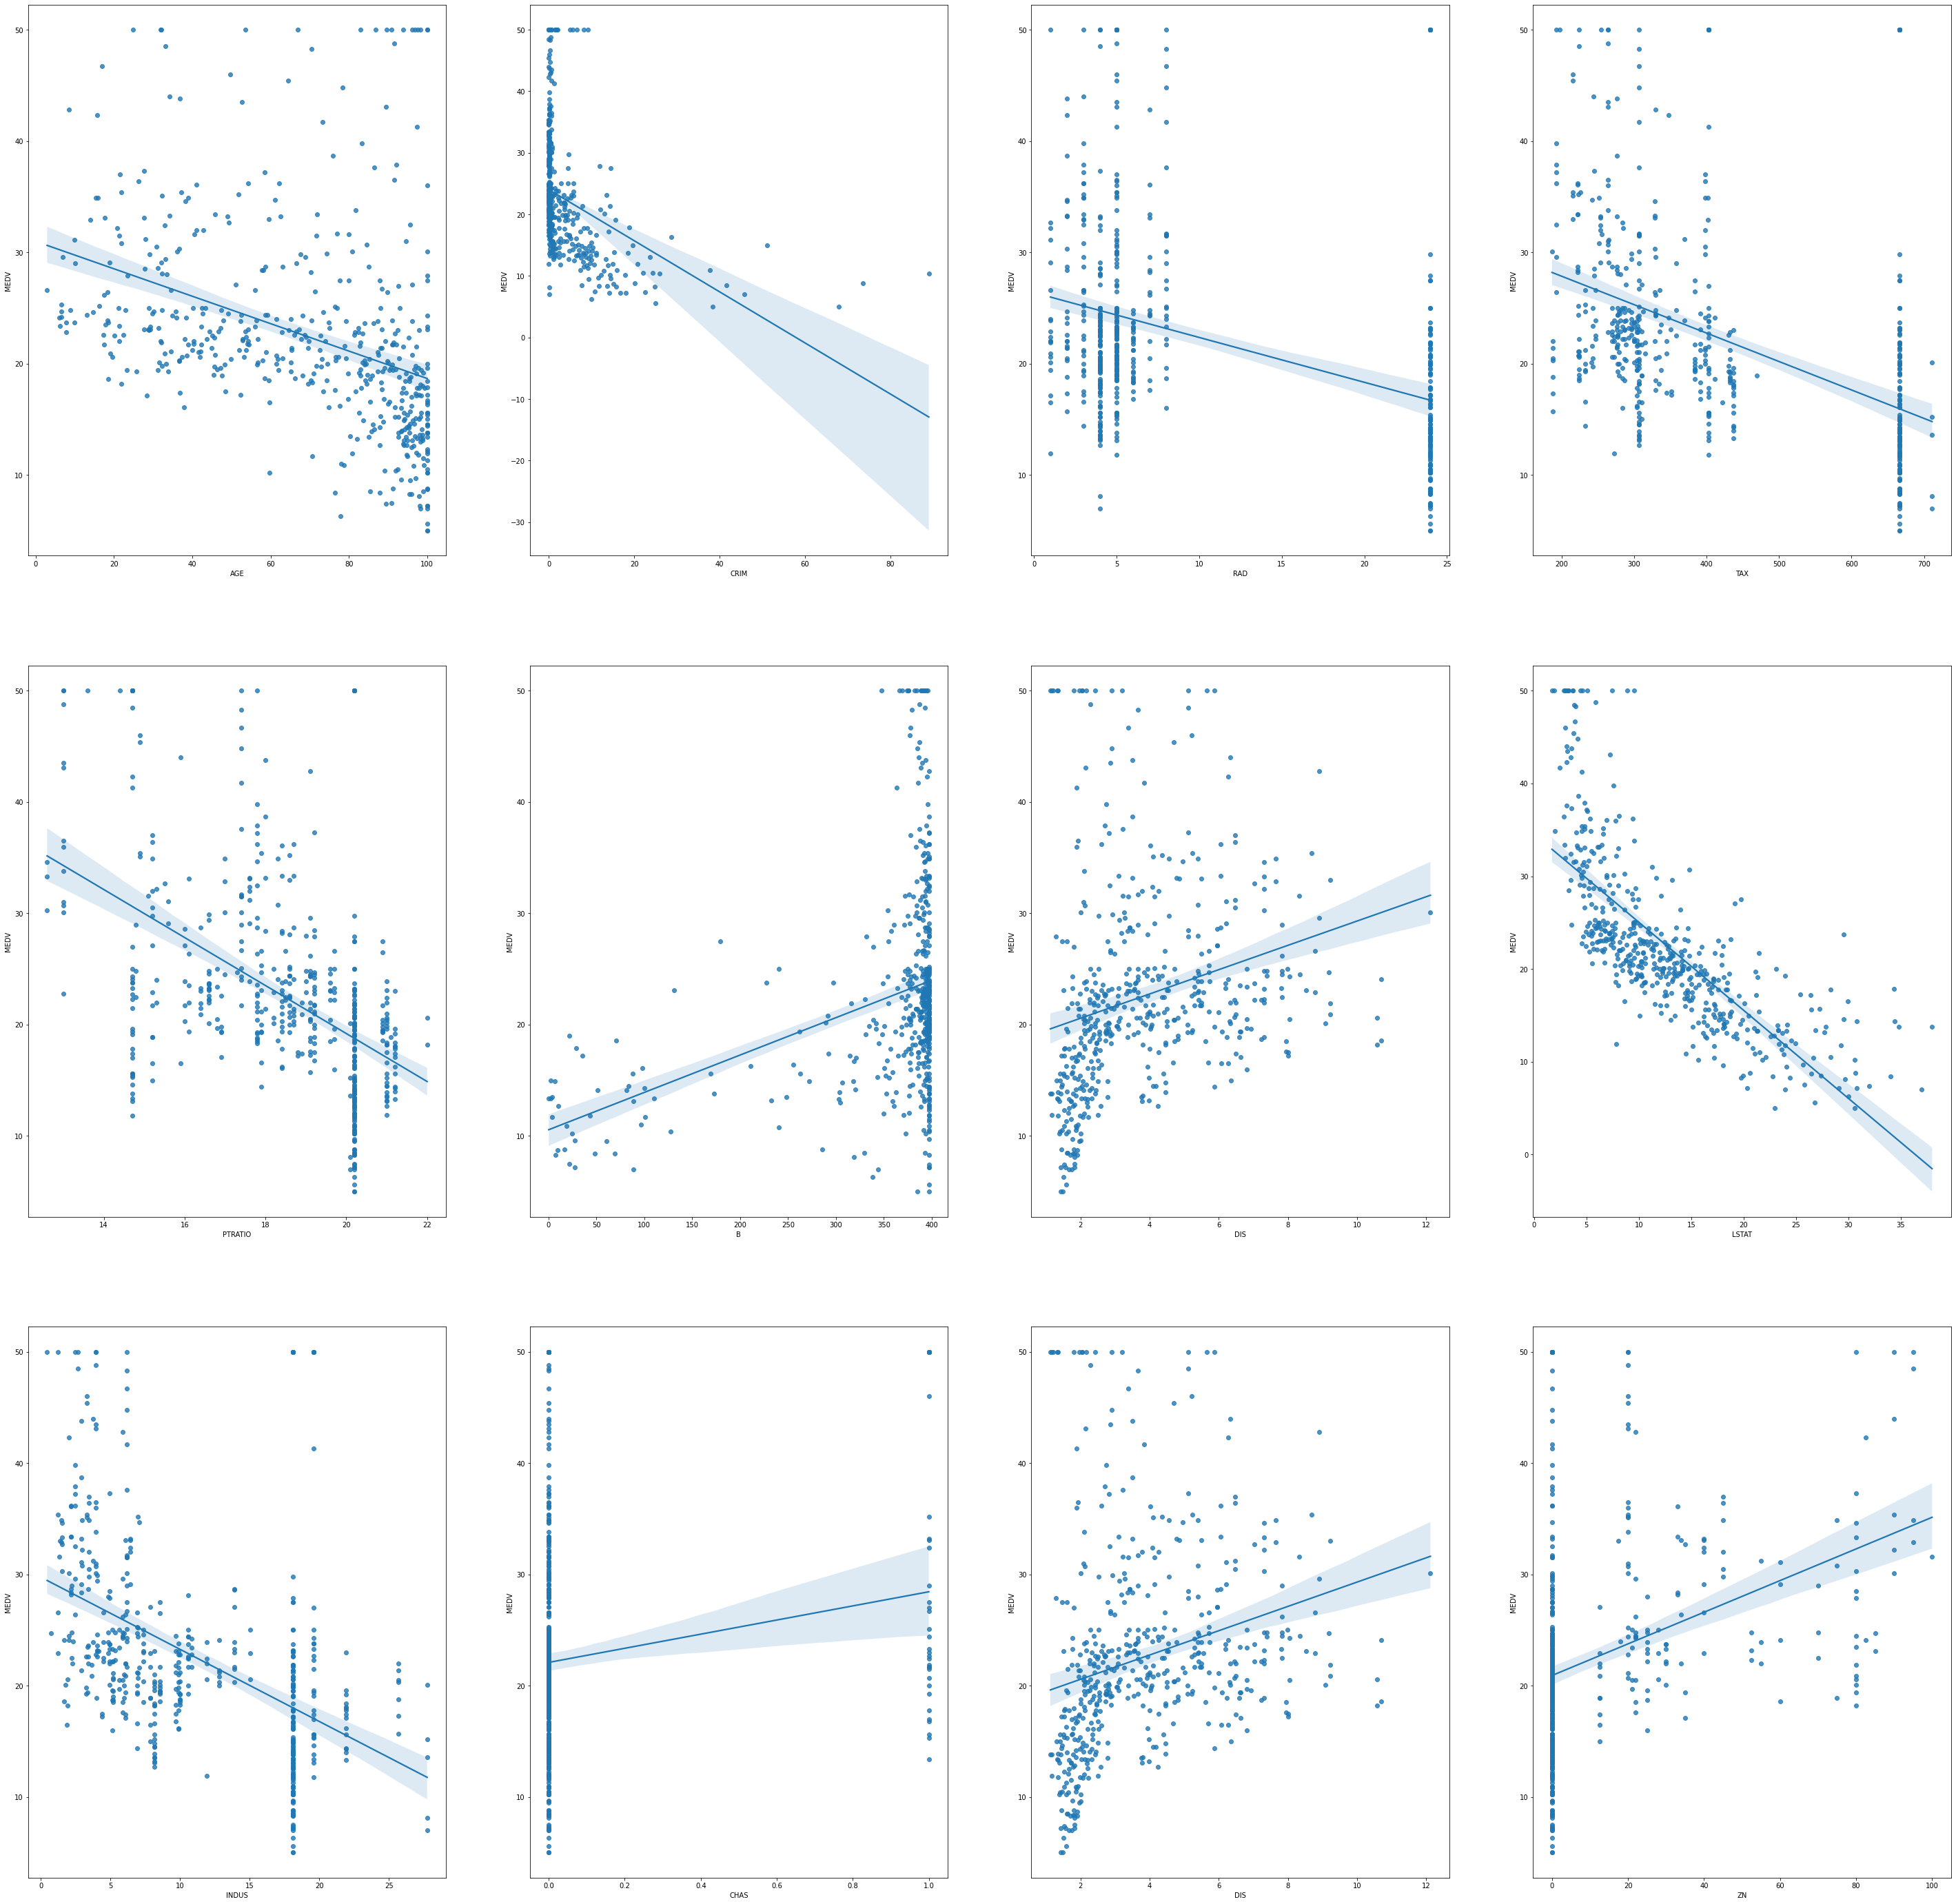

In [40]:
plt.figure(figsize = (50,50))
plt.subplot(3,4,1)
sns.regplot(x=df['AGE'],y=df['MEDV'],data=df)
plt.subplot(3,4,2)
sns.regplot(x=df['CRIM'],y=df['MEDV'],data=df)
plt.subplot(3,4,3)
sns.regplot(x=df['RAD'],y=df['MEDV'],data=df)
plt.subplot(3,4,4)
sns.regplot(x=df['TAX'],y=df['MEDV'],data=df)
plt.subplot(3,4,5)
sns.regplot(x=df['PTRATIO'],y=df['MEDV'],data=df)
plt.subplot(3,4,6)
sns.regplot(x=df['B'],y=df['MEDV'],data=df)
plt.subplot(3,4,7)
sns.regplot(x=df['DIS'],y=df['MEDV'],data=df)
plt.subplot(3,4,8)
sns.regplot(x=df['LSTAT'],y=df['MEDV'],data=df)
plt.subplot(3,4,9)
sns.regplot(x=df['INDUS'],y=df['MEDV'],data=df)
plt.subplot(3,4,10)
sns.regplot(x=df['CHAS'],y=df['MEDV'],data=df)
plt.subplot(3,4,11)
sns.regplot(x=df['DIS'],y=df['MEDV'],data=df)
plt.subplot(3,4,12)
sns.regplot(x=df['ZN'],y=df['MEDV'],data=df)

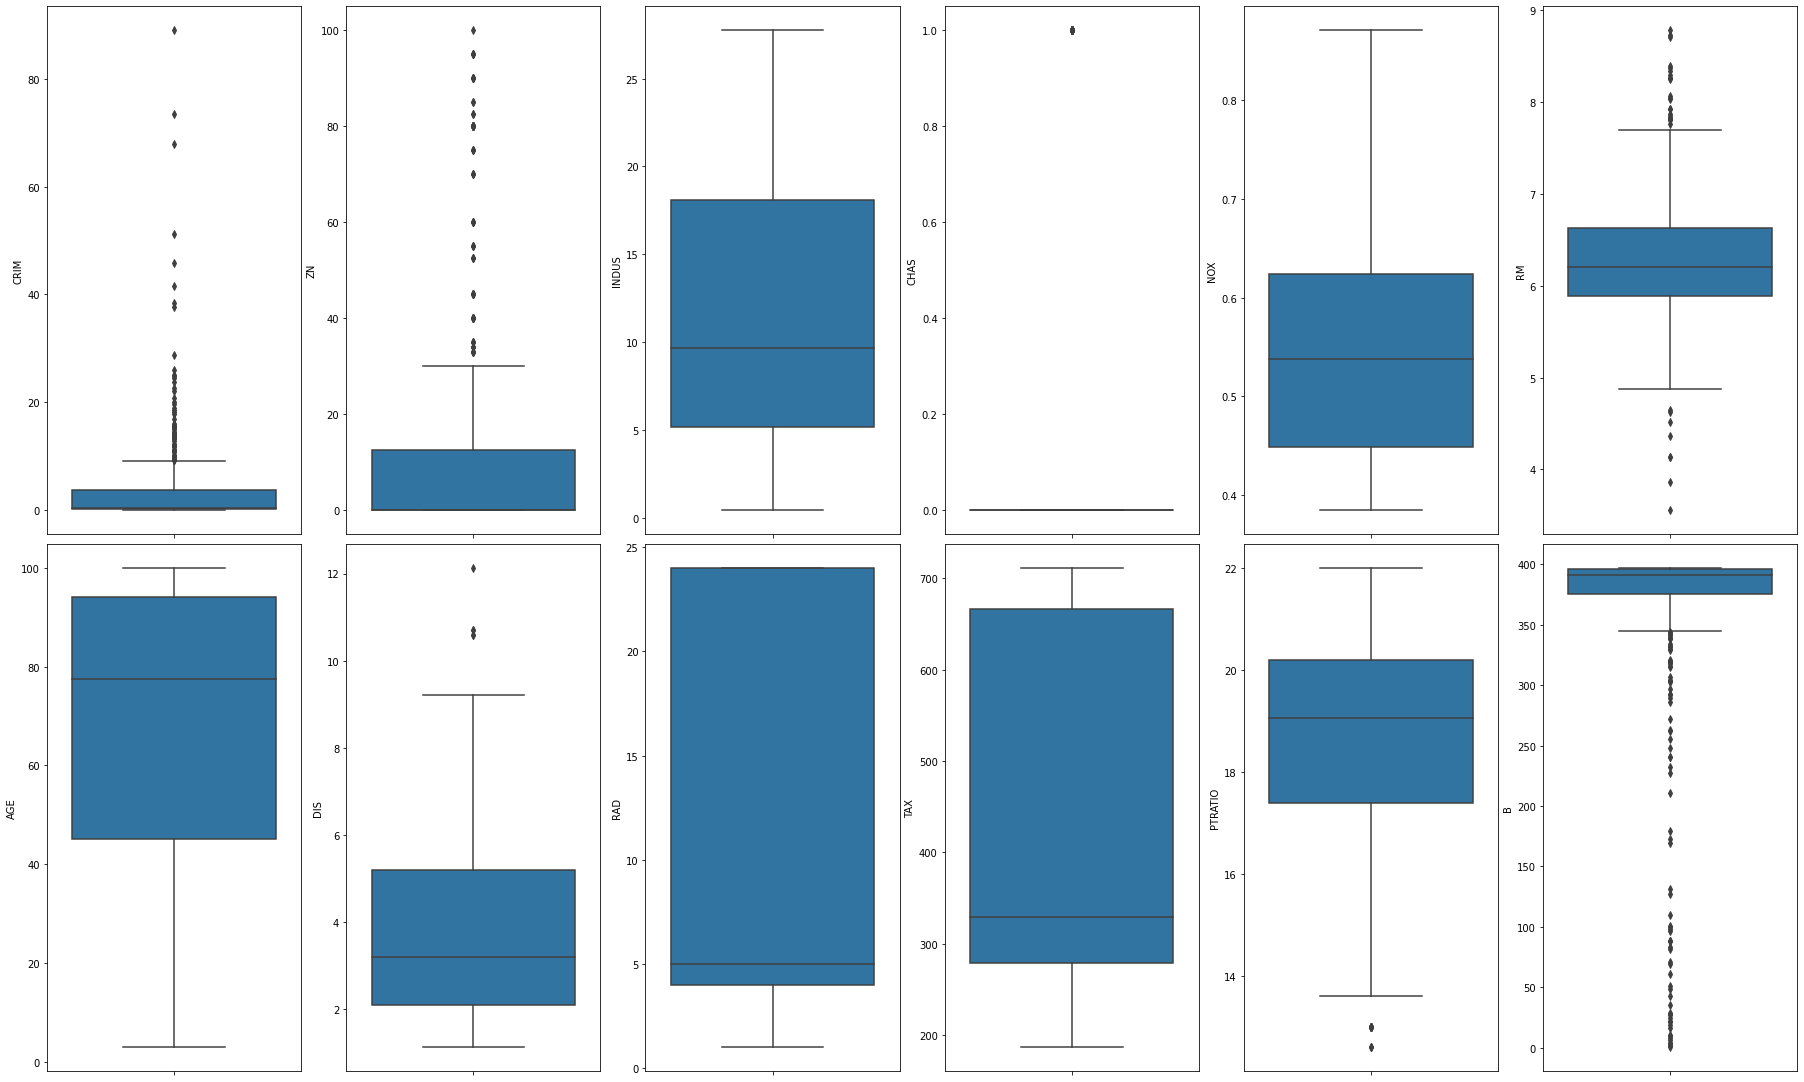

In [41]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(25, 15))
ax = ax.flatten()
index = 0
for i in df.columns:
  if (index >=12):
    break
  sns.boxplot(y=i, data=df, ax=ax[index])
  index +=1
plt.tight_layout(pad=0.5)
plt.show()

In [42]:
corr_matrix

CRIM   ZN  INDUS  CHAS  NOX   RM  AGE  DIS  RAD  TAX  PTRATIO    B  \
CRIM      1.0 -0.2    0.4  -0.1  0.4 -0.2  0.4 -0.4  0.6  0.6      0.3 -0.4   
ZN       -0.2  1.0   -0.5  -0.0 -0.5  0.3 -0.6  0.7 -0.3 -0.3     -0.4  0.2   
INDUS     0.4 -0.5    1.0   0.1  0.8 -0.4  0.6 -0.7  0.6  0.7      0.4 -0.4   
CHAS     -0.1 -0.0    0.1   1.0  0.1  0.1  0.1 -0.1 -0.0 -0.0     -0.1  0.0   
NOX       0.4 -0.5    0.8   0.1  1.0 -0.3  0.7 -0.8  0.6  0.7      0.2 -0.4   
RM       -0.2  0.3   -0.4   0.1 -0.3  1.0 -0.2  0.2 -0.2 -0.3     -0.4  0.1   
AGE       0.4 -0.6    0.6   0.1  0.7 -0.2  1.0 -0.7  0.5  0.5      0.3 -0.3   
DIS      -0.4  0.7   -0.7  -0.1 -0.8  0.2 -0.7  1.0 -0.5 -0.5     -0.2  0.3   
RAD       0.6 -0.3    0.6  -0.0  0.6 -0.2  0.5 -0.5  1.0  0.9      0.5 -0.4   
TAX       0.6 -0.3    0.7  -0.0  0.7 -0.3  0.5 -0.5  0.9  1.0      0.5 -0.4   
PTRATIO   0.3 -0.4    0.4  -0.1  0.2 -0.4  0.3 -0.2  0.5  0.5      1.0 -0.2   
B        -0.4  0.2   -0.4   0.0 -0.4  0.1 -0.3  0.3 -0.4 -0.4     -0.2  1.0   
LSTAT     0.5 -0.4    0.6  -0.1  0.6 -0.6  0.6 -0.5  0.5  0.5      0.4 -0.4   
MEDV     -0.4  0.4   -0.5   0.2 -0.4  0.7 -0.4  0.2 -0.4 -0.5     -0.5  0.3   

         LSTAT  MEDV  
CRIM       0.5  -0.4  
ZN        -0.4   0.4  
INDUS      0.6  -0.5  
CHAS      -0.1   0.2  
NOX        0.6  -0.4  
RM        -0.6   0.7  
AGE        0.6  -0.4  
DIS       -0.5   0.2  
RAD        0.5  -0.4  
TAX        0.5  -0.5  
PTRATIO    0.4  -0.5  
B         -0.4   0.3  
LSTAT      1.0  -0.7  
MEDV      -0.7   1.0

Correlation analysis

#1. The feature 'RM' has a strong positive correlation with the target variable 'MEDV' as the value of 'RM' increases, the value of 'MEDV' also increases. This indicates a positive linear relationship between these two variables. The correlation coefficient between 'RM' and 'MEDV' is 0.7 which is the highest among all features.

#2. The feature 'LSTAT' has a high negative correlation with 'MEDV' as the value of 'LSTAT' increases, the value of 'MEDV' decreases. This indicates a negative linear relationship between these two variables. The correlation coefficient between 'LSTAT' and 'MEDV' is -0.7 which is the second highest among all features.

#3. The feature 'CRIM' has the least correlation value with 'MEDV'.

Preprocessing

In [43]:
print(df.T[df.T.duplicated(keep=False)].T.count())

Series([], dtype: int64)


In [44]:
df[df.duplicated(keep=False)].count()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [45]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='mean')
imputer = imputer.fit(df)
imputed = imputer.transform(df)
df = pd.DataFrame(imputed,columns = df.columns)

In [46]:
min= 100
for i in df.columns:
    corr = df[i].corr(df['MEDV'],method='pearson')
    if(min>abs(corr)):
      min=abs(corr)
      x=i

print(min,x)
df = df.drop(x,axis=1)
df

0.1752601771902987 CHAS


CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0    0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   
1    0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
2    0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
3    0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
4    0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   
..       ...   ...    ...    ...    ...   ...     ...  ...    ...      ...   
501  0.06263   0.0  11.93  0.573  6.593  69.1  2.4786  1.0  273.0     21.0   
502  0.04527   0.0  11.93  0.573  6.120  76.7  2.2875  1.0  273.0     21.0   
503  0.06076   0.0  11.93  0.573  6.976  91.0  2.1675  1.0  273.0     21.0   
504  0.10959   0.0  11.93  0.573  6.794  89.3  2.3889  1.0  273.0     21.0   
505  0.04741   0.0  11.93  0.573  6.030  80.8  2.5050  1.0  273.0     21.0   

          B  LSTAT  MEDV  
0    396.90   4.98  24.0  
1    396.90   9.14  21.6  
2    392.83   4.03  34.7  
3    394.63   2.94  33.4  
4    396.90   5.33  36.2  
..      ...    ...   ...  
501  391.99   9.67  22.4  
502  396.90   9.08  20.6  
503  396.90   5.64  23.9  
504  393.45   6.48  22.0  
505  396.90   7.88  11.9  

[506 rows x 13 columns]

In [47]:

scaler = MinMaxScaler(feature_range=(0, 1))
rescaled = scaler.fit_transform(df)


In [48]:
df = pd.DataFrame(rescaled,columns=df.columns)


In [49]:
for i in df.columns:
  df.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(df[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = df[i][(df[i] < lower_bound) | (df[i] > upper_bound)] #creating a series of outlier data
  perc = (outlier_data.count()/df[i].count())*100
  print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_data.count()))

Outliers in CRIM is 13.04% with count 66
Outliers in ZN is 13.44% with count 68
Outliers in INDUS is 0.00% with count 0
Outliers in NOX is 0.00% with count 0
Outliers in RM is 5.93% with count 30
Outliers in AGE is 0.00% with count 0
Outliers in DIS is 0.99% with count 5
Outliers in RAD is 0.00% with count 0
Outliers in TAX is 0.00% with count 0
Outliers in PTRATIO is 2.96% with count 15
Outliers in B is 15.22% with count 77
Outliers in LSTAT is 1.38% with count 7
Outliers in MEDV is 7.91% with count 40


In [50]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
'''Removing Outliers'''
df = df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

CRIM       0.040407
ZN         0.125000
INDUS      0.473240
NOX        0.360082
RM         0.141406
AGE        0.505149
DIS        0.280829
RAD        0.869565
TAX        0.738550
PTRATIO    0.297872
B          0.052568
LSTAT      0.276076
MEDV       0.177222
dtype: float64


(288, 13)

Model Training and testing


In [51]:
X = df[['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = df['MEDV']

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5,train_size=0.8)

In [53]:
print(len(X_train),len(X_test))

230 58


In [54]:
linearModel = LinearRegression()
supportVectorRegressor = SVR()
knnRegressor = KNeighborsRegressor(n_neighbors=3)

In [55]:
linearModel.fit(X_train,y_train)


LinearRegression()

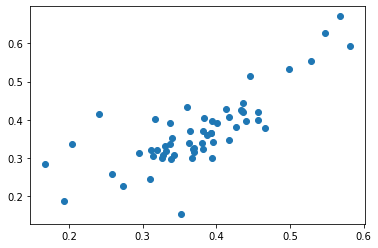

In [56]:
linearPred = linearModel.predict(X_test)
plt.scatter(linearPred,y_test)

In [57]:
knnRegressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

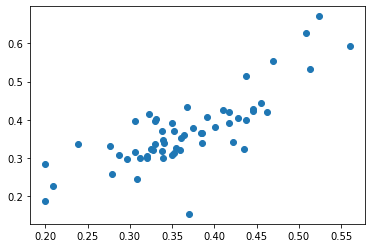

In [58]:
knnPred = knnRegressor.predict(X_test)
plt.scatter(knnPred,y_test)

In [59]:
arr = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
gsmodel = GridSearchCV(estimator=knnRegressor,
                      param_grid={'n_neighbors':arr},
                       cv = 5
                      )
gsmodel.fit(X_train,y_train)
gsPred = gsmodel.predict(X_test)


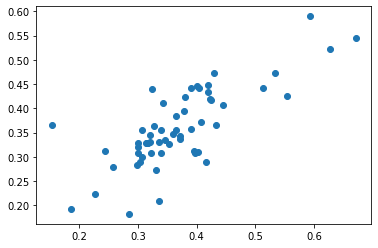

In [60]:
plt.scatter(y_test,gsPred)

In [61]:
gsRes = pd.DataFrame(gsmodel.cv_results_)
gsRes

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.002891      0.000952         0.002900        0.000630   
1        0.001953      0.000232         0.002158        0.000198   
2        0.002072      0.000126         0.002136        0.000106   
3        0.001998      0.000047         0.002209        0.000063   
4        0.001927      0.000193         0.002143        0.000150   
5        0.001818      0.000040         0.002112        0.000092   
6        0.001808      0.000013         0.002054        0.000067   
7        0.001830      0.000023         0.002050        0.000011   
8        0.001841      0.000088         0.002059        0.000082   
9        0.001767      0.000013         0.001998        0.000043   
10       0.001828      0.000020         0.002124        0.000054   
11       0.002110      0.000414         0.002602        0.000579   
12       0.001781      0.000014         0.002070        0.000017   
13       0.001810      0.000057         0.002088        0.000047   
14       0.001839      0.000032         0.002172        0.000079   
15       0.001836      0.000052         0.002243        0.000297   
16       0.001774      0.000010         0.002089        0.000028   
17       0.001767      0.000007         0.002253        0.000285   
18       0.002391      0.000146         0.002929        0.000083   
19       0.002413      0.000241         0.003372        0.000694   

   param_n_neighbors               params  split0_test_score  \
0                  1   {'n_neighbors': 1}           0.670806   
1                  2   {'n_neighbors': 2}           0.690285   
2                  3   {'n_neighbors': 3}           0.682282   
3                  4   {'n_neighbors': 4}           0.715113   
4                  5   {'n_neighbors': 5}           0.675202   
5                  6   {'n_neighbors': 6}           0.681356   
6                  7   {'n_neighbors': 7}           0.637909   
7                  8   {'n_neighbors': 8}           0.602555   
8                  9   {'n_neighbors': 9}           0.576230   
9                 10  {'n_neighbors': 10}           0.565549   
10                11  {'n_neighbors': 11}           0.562317   
11                12  {'n_neighbors': 12}           0.575735   
12                13  {'n_neighbors': 13}           0.536092   
13                14  {'n_neighbors': 14}           0.521048   
14                15  {'n_neighbors': 15}           0.495321   
15                16  {'n_neighbors': 16}           0.475979   
16                17  {'n_neighbors': 17}           0.465861   
17                18  {'n_neighbors': 18}           0.439464   
18                19  {'n_neighbors': 19}           0.423603   
19                20  {'n_neighbors': 20}           0.412360   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.702107           0.574532           0.565432   
1            0.775248           0.712261           0.655621   
2            0.662548           0.722803           0.639275   
3            0.612332           0.725612           0.623600   
4            0.540100           0.724664           0.555705   
5            0.512210           0.704731           0.518588   
6            0.494080           0.687739           0.504221   
7            0.504902           0.650392           0.507028   
8            0.488341           0.622536           0.512165   
9            0.483842           0.591803           0.509303   
10           0.475528           0.589389           0.531945   
11           0.466307           0.576780           0.508411   
12           0.446169           0.585483           0.498216   
13           0.428515           0.586016           0.491856   
14           0.382166           0.573602           0.483174   
15           0.372858           0.557248           0.489578   
16           0.350567           0.550653           0.494500   
17           0.345726           0.553676           0.489301   
18           0.341746           0

In [62]:
gsRes[['param_n_neighbors','rank_test_score']].sort_values(by = 'rank_test_score')

param_n_neighbors  rank_test_score
1                  2                1
2                  3                2
3                  4                3
4                  5                4
5                  6                5
0                  1                6
6                  7                7
7                  8                8
8                  9                9
9                 10               10
10                11               11
11                12               12
12                13               13
13                14               14
14                15               15
15                16               16
16                17               17
17                18               18
18                19               19
19                20               20

In [63]:
#decision tree
decisionTreeRegressor = DecisionTreeRegressor()
decisionTreeRegressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [64]:
DTpred = decisionTreeRegressor.predict(X_test)


In [65]:
from sklearn.tree import export_text
tree_rules = export_text(decisionTreeRegressor, feature_names=list(X.columns))
print(tree_rules)

|--- LSTAT <= 0.23
|   |--- TAX <= 0.07
|   |   |--- CRIM <= 0.00
|   |   |   |--- RM <= 0.61
|   |   |   |   |--- value: [0.53]
|   |   |   |--- RM >  0.61
|   |   |   |   |--- value: [0.62]
|   |   |--- CRIM >  0.00
|   |   |   |--- AGE <= 0.78
|   |   |   |   |--- CRIM <= 0.00
|   |   |   |   |   |--- value: [0.63]
|   |   |   |   |--- CRIM >  0.00
|   |   |   |   |   |--- PTRATIO <= 0.40
|   |   |   |   |   |   |--- CRIM <= 0.00
|   |   |   |   |   |   |   |--- value: [0.68]
|   |   |   |   |   |   |--- CRIM >  0.00
|   |   |   |   |   |   |   |--- value: [0.67]
|   |   |   |   |   |--- PTRATIO >  0.40
|   |   |   |   |   |   |--- value: [0.69]
|   |   |   |--- AGE >  0.78
|   |   |   |   |--- value: [0.61]
|   |--- TAX >  0.07
|   |   |--- RM <= 0.57
|   |   |   |--- LSTAT <= 0.17
|   |   |   |   |--- PTRATIO <= 0.75
|   |   |   |   |   |--- TAX <= 0.17
|   |   |   |   |   |   |--- LSTAT <= 0.15
|   |   |   |   |   |   |   |--- ZN <= 0.20
|   |   |   |   |   |   |   |   |--- AGE <

In [66]:
#plotting the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(400,350))
plot_tree(decisionTreeRegressor,feature_names=list(X.columns),filled=True,fontsize=10)
plt.show()


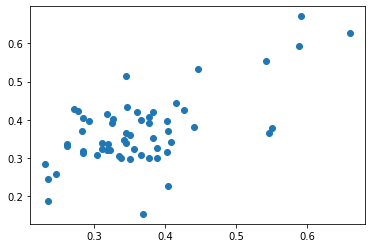

In [67]:
plt.scatter(DTpred, y_test)

In [68]:
#SVR
supportVectorRegressor = SVR()
supportVectorRegressor.fit(X_train,y_train)

SVR()

In [69]:
svrPred = supportVectorRegressor.predict(X_test)


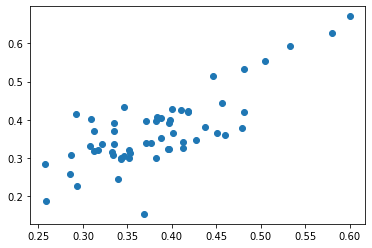

In [70]:
plt.scatter(svrPred,y_test)

In [71]:
print("METRICS FOR LINEAR REGRESSION")
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, linearPred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, linearPred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, linearPred)))
print('R-squared error : ',r2_score(y_test, linearPred))

METRICS FOR LINEAR REGRESSION
Mean Absolute Error : 0.043032310394068275
Mean Squared Error: 0.0035468288084634565
Root Mean Squared Error: 0.05955525844510673
R-squared error :  0.6017659680907474


In [72]:
print("METRICS FOR KNN")
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, gsPred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, gsPred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, gsPred)))
print('R-squared error : ',r2_score(y_test, gsPred))

METRICS FOR KNN
Mean Absolute Error : 0.04457854406130267
Mean Squared Error: 0.0037945721583652614
Root Mean Squared Error: 0.06160009868795067
R-squared error :  0.5739496176442083


In [73]:
print("METRICS FOR DT")
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, DTpred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, DTpred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, DTpred)))
print('R-squared error : ',r2_score(y_test, DTpred))


METRICS FOR DT
Mean Absolute Error : 0.05915708812260537
Mean Squared Error: 0.0062690506598552555
Root Mean Squared Error: 0.07917733678177902
R-squared error :  0.2961178970464424


In [74]:
print("METRICS FOR SVR")
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, svrPred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svrPred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, svrPred)))
print('R-squared error : ',r2_score(y_test, svrPred))


METRICS FOR SVR
Mean Absolute Error : 0.04869179940371781
Mean Squared Error: 0.0037610047754011904
Root Mean Squared Error: 0.06132703135976166
R-squared error :  0.5777185264301429


# Review - 2

-------------------------------------------------------------------------------------------------------------------------------------------------

#### Multi - Layer Perceptron

In [75]:
from sklearn.neural_network import MLPRegressor
MLPModel = MLPRegressor(hidden_layer_sizes=5,activation='tanh',solver='sgd',learning_rate='adaptive')

In [76]:
hidden_layer_sizes = [1,2,3,4,5,6,7,8]
gsmodel = GridSearchCV(estimator=MLPModel,
                      param_grid={'hidden_layer_sizes':hidden_layer_sizes,
                                'activation':['relu','tanh']
                                },
                       cv = 5
                      )
gsmodel

GridSearchCV(cv=5,
             estimator=MLPRegressor(activation='tanh', hidden_layer_sizes=5,
                                    learning_rate='adaptive', solver='sgd'),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [1, 2, 3, 4, 5, 6, 7, 8]})

In [77]:
gsmodel.fit(X_train,y_train)
gsMLPPred = gsmodel.predict(X_test)
gsMLPPred

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

array([0.43870415, 0.43870415, 0.2010602 , 0.43870415, 0.43870415,
       0.20160753, 0.43870415, 0.43870415, 0.43870415, 0.43870415,
       0.43870415, 0.43870415, 0.43870415, 0.43870415, 0.43870415,
       0.43870415, 0.43870415, 0.43870415, 0.43870415, 0.43870415,
       0.43870415, 0.43870415, 0.43870415, 0.43870415, 0.43870415,
       0.43870415, 0.43870415, 0.43870415, 0.43870415, 0.43870415,
       0.43870415, 0.43870415, 0.1666984 , 0.43870415, 0.43870415,
       0.43870415, 0.43870415, 0.43870415, 0.43870415, 0.43870415,
       0.43870415, 0.43870415, 0.43870415, 0.43870415, 0.43870415,
       0.20300897, 0.43870415, 0.19124444, 0.43870415, 0.43870415,
       0.43870415, 0.43870415, 0.43870415, 0.11684327, 0.43870415,
       0.43870415, 0.43870415, 0.14125454])

In [78]:
MLPGSres = pd.DataFrame(gsmodel.cv_results_)
MLPGSres

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.091661      0.018300         0.003427        0.000273   
1        0.078714      0.027167         0.003728        0.000990   
2        0.075554      0.025069         0.003651        0.000931   
3        0.058182      0.014952         0.002180        0.000093   
4        0.045991      0.013276         0.002151        0.000061   
5        0.053449      0.009143         0.002427        0.000339   
6        0.037164      0.006999         0.002354        0.000470   
7        0.040326      0.005738         0.002359        0.000512   
8        0.048219      0.008697         0.001996        0.000162   
9        0.039868      0.012084         0.001803        0.000021   
10       0.048766      0.012878         0.001899        0.000106   
11       0.051460      0.013498         0.001897        0.000074   
12       0.040563      0.004067         0.001854        0.000049   
13       0.046201      0.011265         0.001883        0.000067   
14       0.040046      0.010548         0.001796        0.000022   
15       0.042877      0.005610         0.002017        0.000402   

   param_activation param_hidden_layer_sizes  \
0              relu                        1   
1              relu                        2   
2              relu                        3   
3              relu                        4   
4              relu                        5   
5              relu                        6   
6              relu                        7   
7              relu                        8   
8              tanh                        1   
9              tanh                        2   
10             tanh                        3   
11             tanh                        4   
12             tanh                        5   
13             tanh                        6   
14             tanh                        7   
15             tanh                        8   

                                             params  split0_test_score  \
0   {'activation': 'relu', 'hidden_layer_sizes': 1}          -1.460587   
1   {'activation': 'relu', 'hidden_layer_sizes': 2}          -2.738653   
2   {'activation': 'relu', 'hidden_layer_sizes': 3}          -4.732934   
3   {'activation': 'relu', 'hidden_layer_sizes': 4}          -0.397559   
4   {'activation': 'relu', 'hidden_layer_sizes': 5}          -3.093769   
5   {'activation': 'relu', 'hidden_layer_sizes': 6}          -1.348123   
6   {'activation': 'relu', 'hidden_layer_sizes': 7}          -1.353523   
7   {'activation': 'relu', 'hidden_layer_sizes': 8}          -1.626486   
8   {'activation': 'tanh', 'hidden_layer_sizes': 1}           0.151521   
9   {'activation': 'tanh', 'hidden_layer_sizes': 2}          -1.279673   
10  {'activation': 'tanh', 'hidden_layer_sizes': 3}          -1.341205   
11  {'activation': 'tanh', 'hidden_layer_sizes': 4}          -3.771222   
12  {'activation': 'tanh', 'hidden_layer_sizes': 5}          -3.606942   
13  {'activation': 'tanh', 'hidden_layer_sizes': 6}          -7.178351   
14  {'activation': 'tanh', 'hidden_layer_sizes': 7}          -1.009990   
15  {'activation': 'tanh', 'hidden_layer_sizes': 8}          -4.380860   

    split1_test_score  split2_test_score  split3_test_score  \
0           -0.590166          -0.216240          -0.140780   
1           -4.580877          -1.998673          -0.969434   
2           -3.107071          -6.907207          -2.385548   
3           -1.011026          -5.290680          -3.743270   
4           -7.782195          -5.621519          -1.809567   
5          -11.197336          -0.469531          -3.972193   
6           -2.370565          -1.258444          -3.223965   
7           -0.912238          -1.222341          -0.972591   
8           -4.216570          -0.673987          -1.014772   
9           -2.797381          -6.417087          -0.286649   
10          -8.888583          -0.303429          -0.360311   
11          -7.

In [79]:

MLPpred = gsmodel.best_estimator_.predict(X_test)


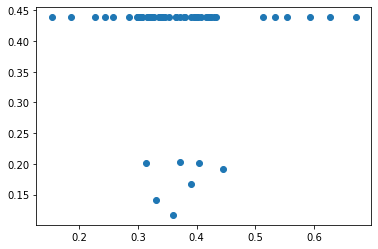

In [80]:
plt.scatter(y_test,MLPpred)

In [81]:
print("METRICS FOR MLPRegressor")
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, MLPpred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, MLPpred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, MLPpred)))
print('R-squared error : ',r2_score(y_test, MLPpred))


METRICS FOR MLPRegressor
Mean Absolute Error : 0.1149994282233461
Mean Squared Error: 0.018007745667300897
Root Mean Squared Error: 0.13419294194293863
R-squared error :  -1.0218898486370227


#### Adaboosting Regressor

In [82]:
from sklearn.ensemble import AdaBoostRegressor
ABmodel = AdaBoostRegressor()
gsmodel = GridSearchCV(estimator=ABmodel,
                      param_grid={'n_estimators':[10,20,50,100,200,300,500,1000],
                                },
                       cv = 5
                      )
gsmodel.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'n_estimators': [10, 20, 50, 100, 200, 300, 500,
                                          1000]})

In [83]:
GSABmodel = pd.DataFrame(gsmodel.cv_results_)
GSABmodel

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.016952      0.000480         0.002528        0.000076   
1       0.030186      0.000301         0.003110        0.000032   
2       0.073981      0.003208         0.005528        0.000965   
3       0.140420      0.003091         0.008393        0.000253   
4       0.277749      0.006090         0.014623        0.000276   
5       0.432801      0.019596         0.024456        0.004894   
6       0.703759      0.005913         0.036745        0.006234   
7       1.401893      0.013323         0.068512        0.005118   

  param_n_estimators                  params  split0_test_score  \
0                 10    {'n_estimators': 10}           0.635189   
1                 20    {'n_estimators': 20}           0.588470   
2                 50    {'n_estimators': 50}           0.669711   
3                100   {'n_estimators': 100}           0.682552   
4                200   {'n_estimators': 200}           0.662662   
5                300   {'n_estimators': 300}           0.661710   
6                500   {'n_estimators': 500}           0.684162   
7               1000  {'n_estimators': 1000}           0.676624   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.599752           0.814439           0.704147           0.547184   
1           0.647504           0.805160           0.697679           0.592191   
2           0.672674           0.799520           0.730020           0.553272   
3           0.681398           0.802232           0.709909           0.599737   
4           0.666389           0.786537           0.734814           0.606377   
5           0.665316           0.799925           0.743244           0.601373   
6           0.671423           0.804490           0.734999           0.600362   
7           0.678648           0.803211           0.740746           0.594432   

   mean_test_score  std_test_score  rank_test_score  
0         0.660142        0.092491                8  
1         0.666201        0.080212                7  
2         0.685039        0.081092                6  
3         0.695165        0.065017                3  
4         0.691356        0.062636                5  
5         0.694314        0.069412                4  
6         0.699087        0.068021                1  
7         0.698732        0.069931                2

In [85]:
GSABPred = gsmodel.best_estimator_.predict(X_test)
metrics.mean_squared_error(y_test,GSABPred)

0.0034356554871714314

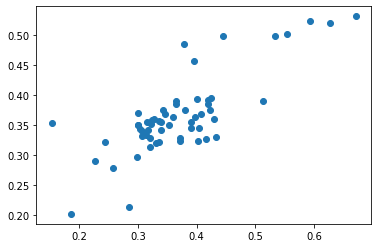

In [86]:
plt.scatter(y_test,GSABPred)

In [87]:
print("METRICS FOR Ada Boosting Regressor")
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, GSABPred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, GSABPred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, GSABPred)))
print('R-squared error : ',r2_score(y_test, GSABPred))

METRICS FOR Ada Boosting Regressor
Mean Absolute Error : 0.04524844005480816
Mean Squared Error: 0.0034356554871714314
Root Mean Squared Error: 0.05861446482884094
R-squared error :  0.6142483861519805


#### Gradient Boosting Regressor

In [88]:
from sklearn.ensemble import GradientBoostingRegressor
GBmodel = GradientBoostingRegressor()
gsmodel = GridSearchCV(estimator=GBmodel,
                      param_grid={'n_estimators':[10,20,50,100,200,300,500,1000],
                                },
                       cv = 5
                      )
gsmodel.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [10, 20, 50, 100, 200, 300, 500,
                                          1000]})

In [89]:
GSGBmodel = pd.DataFrame(gsmodel.cv_results_)
GSGBmodel

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.010097      0.003915         0.001887        0.000213   
1       0.015074      0.001711         0.002175        0.000069   
2       0.033957      0.003162         0.002494        0.000381   
3       0.062310      0.002685         0.002537        0.000338   
4       0.129563      0.004061         0.002511        0.000136   
5       0.186649      0.003657         0.002327        0.000079   
6       0.313420      0.007638         0.002975        0.000050   
7       0.614420      0.008377         0.003748        0.000286   

  param_n_estimators                  params  split0_test_score  \
0                 10    {'n_estimators': 10}           0.491823   
1                 20    {'n_estimators': 20}           0.546800   
2                 50    {'n_estimators': 50}           0.546385   
3                100   {'n_estimators': 100}           0.549802   
4                200   {'n_estimators': 200}           0.591842   
5                300   {'n_estimators': 300}           0.571510   
6                500   {'n_estimators': 500}           0.578575   
7               1000  {'n_estimators': 1000}           0.587173   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.617517           0.629492           0.544662           0.468138   
1           0.697726           0.767058           0.690126           0.597652   
2           0.730954           0.792531           0.769784           0.668113   
3           0.734743           0.801452           0.781923           0.690751   
4           0.724172           0.803252           0.792762           0.704490   
5           0.719631           0.807902           0.794932           0.702461   
6           0.719557           0.784368           0.792877           0.705019   
7           0.719148           0.793361           0.793063           0.706318   

   mean_test_score  std_test_score  rank_test_score  
0         0.550326        0.064794                8  
1         0.659872        0.078095                7  
2         0.701553        0.088309                6  
3         0.711734        0.089630                5  
4         0.723304        0.075964                1  
5         0.719287        0.084494                3  
6         0.716079        0.076945                4  
7         0.719813        0.075565                2

In [90]:
GSGBPred = gsmodel.best_estimator_.predict(X_test)
metrics.mean_squared_error(y_test,GSGBPred)

0.0022496169962608796

In [91]:
print("METRICS FOR Gradient Boosting Regressor")
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, GSGBPred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, GSGBPred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, GSGBPred)))
print('R-squared error : ',r2_score(y_test, GSGBPred))

METRICS FOR Gradient Boosting Regressor
Mean Absolute Error : 0.03481446488981866
Mean Squared Error: 0.0022496169962608796
Root Mean Squared Error: 0.047430127516810236
R-squared error :  0.7474154815324568


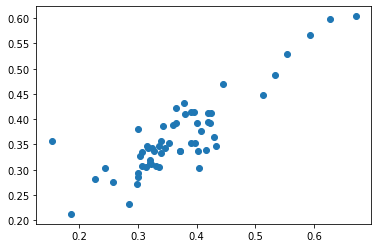

In [92]:
plt.scatter(y_test,GSGBPred)

# Bagging Regressor

In [93]:
#Bagging regressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
regr1 = BaggingRegressor(max_features= 12, random_state=1)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(regr1, X, y, cv=cv, n_jobs=-1)
regr1.fit(X_train, y_train)

BaggingRegressor(max_features=12, random_state=1)

In [94]:
baggingPred = regr1.predict(X_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


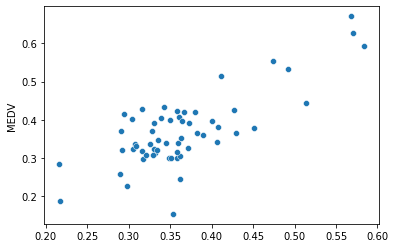

In [95]:
sns.scatterplot(baggingPred,y_test)

In [96]:
print("METRICS FOR Bagging Regressor")
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, baggingPred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, baggingPred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, baggingPred)))
print('R-squared error : ',r2_score(y_test, baggingPred))

METRICS FOR Bagging Regressor
Mean Absolute Error : 0.048210727969348666
Mean Squared Error: 0.0037072379736057897
Root Mean Squared Error: 0.06088709201140903
R-squared error :  0.5837554037135222


# RandomForest Regressor

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
regr2 = RandomForestRegressor(max_features= 12, random_state=1)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(regr2, X, y, cv=cv, n_jobs=-1)
regr2.fit(X_train, y_train)

RandomForestRegressor(max_features=12, random_state=1)

In [98]:
RandomForestPred = regr2.predict(X_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


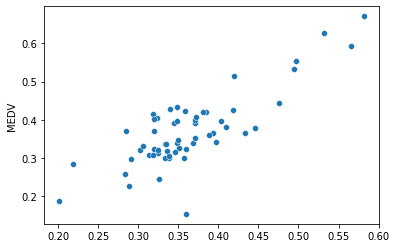

In [99]:
sns.scatterplot(RandomForestPred,y_test)

In [100]:
print("METRICS FOR Random Forest Regressor")
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, RandomForestPred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, RandomForestPred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, RandomForestPred)))
print('R-squared error : ',r2_score(y_test, RandomForestPred))

METRICS FOR Random Forest Regressor
Mean Absolute Error : 0.04293716475095785
Mean Squared Error: 0.003107522622392509
Root Mean Squared Error: 0.05574515783808051
R-squared error :  0.6510907827827481


In [153]:
a = np.zeros(len(df['MEDV'].values))

In [154]:
len(df['MEDV'].values)

288

In [160]:
df.values

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 4.22222222e-01],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 3.68888889e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.89737254e-01, 6.34657837e-02, 6.60000000e-01],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 4.20000000e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.91300620e-01, 1.31070640e-01, 3.77777778e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 1.53333333e-01]])

In [148]:
df1 = pd.DataFrame(df.values
df1

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 4.22222222e-01],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 3.68888889e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.89737254e-01, 6.34657837e-02, 6.60000000e-01],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 4.20000000e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.91300620e-01, 1.31070640e-01, 3.77777778e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 1.53333333e-01]])

In [123]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            496, 497, 498, 499, 500, 501, 502, 503, 504, 505],
           dtype='int64', length=288)

In [157]:
k=0

In [161]:
for i in df['MEDV'].values:
  if i < 0.25:
    a[k]=0
    k+=1
  elif 0.25< i <0.5:
    a[k]=1
    k+=1
  elif 0.5< i <0.75:
    a[k]=2
    k+=1
  elif 0.75< i <1:
    a[k]=3
    k+=1
  


In [162]:
df['Class'] =a

In [163]:
x = df.drop('Class',axis=1)
y = df['Class']

In [164]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=15,test_size=0.2)

In [165]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(X_train, y_train)

GaussianNB()

In [166]:
naive = model1.predict(X_test)

In [167]:
print("METRICS FOR Gaussian Naive Bayes")
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, naive))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, naive))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, naive)))
print('R-squared error : ',r2_score(y_test, naive))

METRICS FOR Gaussian Naive Bayes
Mean Absolute Error : 0.46551724137931033
Mean Squared Error: 0.46551724137931033
Root Mean Squared Error: 0.682288239221013
R-squared error :  -3.386554621848738


In [176]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['RM','MEDV']])
y_predicted

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0], dtype=int32)

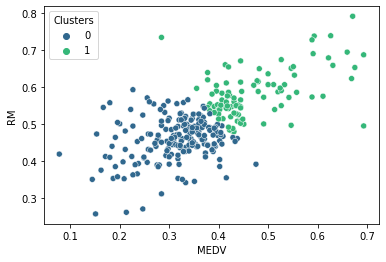

In [177]:
df['Clusters'] = km.labels_
sns.scatterplot(x="MEDV", y="RM",hue = 'Clusters',  data=df,palette='viridis')

In [182]:
df_scale = pd.DataFrame(df, columns = ['MEDV','RM'])

In [183]:
#ELBOW Method
K=range(2,12)
wss = []
import sklearn.cluster as cluster
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

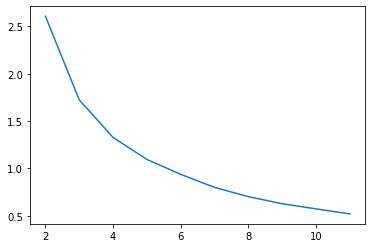

In [184]:
plt.plot(K,wss)

In [185]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,13):
  labels=cluster.KMeans(n_clusters=i,random_state=200).fit(df_scale).labels_
  print ("Silhouette score for k(clusters) = "+str(i)+" is " +str(metrics.silhouette_score(df_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.44186180514409695
Silhouette score for k(clusters) = 3 is 0.38322672604105557
Silhouette score for k(clusters) = 4 is 0.3609427081167574
Silhouette score for k(clusters) = 5 is 0.3611806573734994
Silhouette score for k(clusters) = 6 is 0.3615688991664906
Silhouette score for k(clusters) = 7 is 0.33640133428204144
Silhouette score for k(clusters) = 8 is 0.34939826778872773
Silhouette score for k(clusters) = 9 is 0.3605857506283004
Silhouette score for k(clusters) = 10 is 0.3392824189687245
Silhouette score for k(clusters) = 11 is 0.33738155177817386
Silhouette score for k(clusters) = 12 is 0.3524686441178772
